In [2]:
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.stattools import adfuller, kpss
import numpy as np
from statsmodels.tsa.seasonal import seasonal_decompose

**Interpretation:**

The Augmented Dickey-Fuller (ADF) test checks the null hypothesis (H₀) that a time series has a unit root, indicating non-stationarity.

**p-value > 0.05:**
* The p-value is higher than 0.05, signifying that we fail to reject the null hypothesis at a 5% significance level. 
* This suggests that the `Adj Close` series is non-stationary.

**ADF Statistic:**
* The ADF statistic is not significantly lower than the critical values for stationarity, further supporting the conclusion of non-stationarity in the series.

In [3]:
tsla_df = pd.read_csv('../data/TSLA_data_cleaned.csv')
tsla_df

,Date,Date.1,Open,High,Low,Close,Adj Close,Volume
0,0,2015-01-02 00:00:00+00:00,14.620667,14.620667,14.883333,14.217333,14.858000,71466000
1,1,2015-01-05 00:00:00+00:00,14.006000,14.006000,14.433333,13.810667,14.303333,80527500
2,2,2015-01-06 00:00:00+00:00,14.085333,14.085333,14.280000,13.614000,14.004000,93928500
3,3,2015-01-07 00:00:00+00:00,14.063333,14.063333,14.318667,13.985333,14.223333,44526000
4,4,2015-01-08 00:00:00+00:00,14.041333,14.041333,14.253333,14.000667,14.187333,51637500
...,...,...,...,...,...,...,...,...
2469,2469,2024-10-24 00:00:00+00:00,260.480011,260.480011,262.119995,242.649994,244.679993,204491900
2470,2470,2024-10-25 00:00:00+00:00,269.190002,269.190002,269.489990,255.320007,256.010010,161611900
2471,2471,2024-10-28 00:00:00+00:00,262.510010,262.510010,273.540009,262.239990,270.000000,107653600
2472,2472,2024-10-29 00:00:00+00:00,259.519989,259.519989,264.980011,255.509995,264.510010,80521800


In [4]:
tsla_df = tsla_df[['Date.1', 'Adj Close']]
# Convert the 'Date' column to datetime
tsla_df['Date.1'] = pd.to_datetime(tsla_df['Date.1'])
tsla_df = tsla_df.set_index(tsla_df['Date.1']).drop('Date.1', axis=1)
tsla_df.head()

C:\Users\HP\AppData\Local\Temp\ipykernel_20128\1163817524.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  tsla_df['Date.1'] = pd.to_datetime(tsla_df['Date.1'])


,Adj Close
Date.1,
2015-01-02 00:00:00+00:00,14.858000
2015-01-05 00:00:00+00:00,14.303333
2015-01-06 00:00:00+00:00,14.004000
2015-01-07 00:00:00+00:00,14.223333
2015-01-08 00:00:00+00:00,14.187333


In [5]:
tsla_df = tsla_df.resample("MS").last()

In [6]:
tsla_df.describe().T

,count,mean,std,min,25%,50%,75%,max
Adj Close,118.0,113.260113,112.004238,12.34,16.874833,25.623667,220.782497,381.456665


(<Figure size 1600x400 with 1 Axes>, <Axes: ylabel='Adj Close'>)

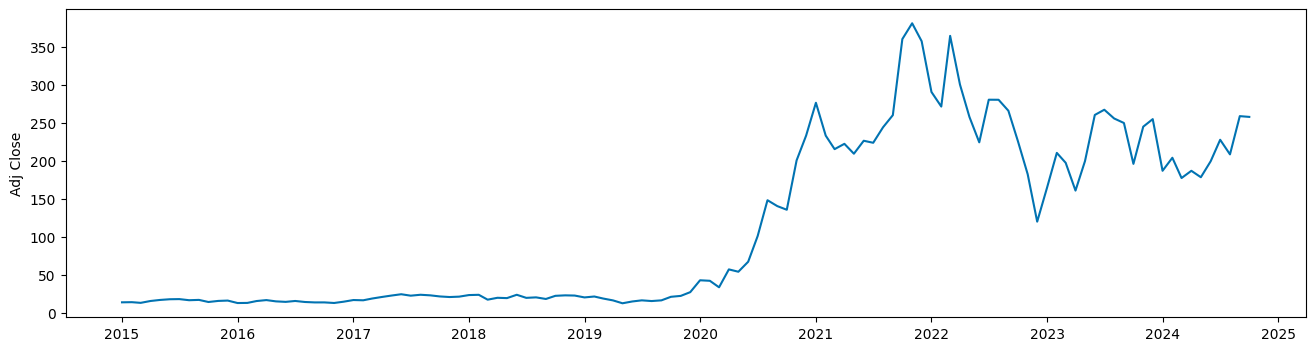

In [8]:
from sktime.utils.plotting import plot_series
plot_series(tsla_df, markers=' ')

In [ ]:
adf_result = adfuller(tsla_df)
print(adf_result[1])

0.6606174373832763


**Interpretation:**

The Augmented Dickey-Fuller (ADF) test checks the null hypothesis (H₀) that a time series has a unit root, indicating non-stationarity.

**p-value > 0.05:**
* The p-value is higher than 0.05, signifying that we fail to reject the null hypothesis at a 5% significance level. 
* This suggests that the `Adj Close` series is non-stationary.

**ADF Statistic:**
* The ADF statistic is not significantly lower than the critical values for stationarity, further supporting the conclusion of non-stationarity in the series.

In [9]:
kpss_result = kpss(tsla_df)
print(kpss_result[1])

0.01


C:\Users\HP\AppData\Local\Temp\ipykernel_20128\80085225.py:1: InterpolationWarning: The test statistic is outside of the range of p-values available in the
look-up table. The actual p-value is smaller than the p-value returned.

  kpss_result = kpss(tsla_df)


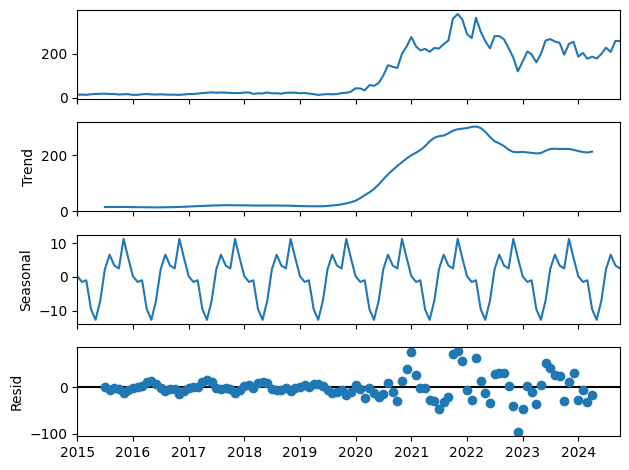

In [66]:
result = seasonal_decompose(tsla_df, model='additive')
result.plot()
plt.show()

In [16]:
# Machine Learning and Forecasting Libraries
#import pmdarima as pm
#from pmdarima import auto_arima
from statsmodels.tsa.arima.model import ARIMA
from sktime.split import temporal_train_test_split
from sklearn.metrics import mean_squared_error, mean_absolute_error, mean_absolute_percentage_error
train, test = temporal_train_test_split(tsla_df, test_size=24)

In [17]:
model = ARIMA(train, order=(1,1,0))
model_fit = model.fit()
print(model_fit.summary())

                               SARIMAX Results                                
Dep. Variable:              Adj Close   No. Observations:                   94
Model:                 ARIMA(1, 1, 0)   Log Likelihood                -425.751
Date:                Wed, 20 Nov 2024   AIC                            855.502
Time:                        21:25:29   BIC                            860.567
Sample:                    01-01-2015   HQIC                           857.547
                         - 10-01-2022                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.0889      0.063      1.400      0.161      -0.036       0.213
sigma2       554.4328     40.419     13.717      0.000     475.213     633.653
Ljung-Box (L1) (Q):                   0.01   Jarque-

In [18]:
history = train
predictions = list()
# walk-forward validation
for t in range(len(test),0,-1):
    model = ARIMA(tsla_df[:-t], order=(1,1,0))
    model_fit = model.fit()
    output = model_fit.forecast()
    yhat = output.iloc[0]
    predictions.append(yhat)

C:\Users\HP\AppData\Local\Temp\ipykernel_20128\1269829259.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test.loc[:,'predictions'] = predictions.copy()


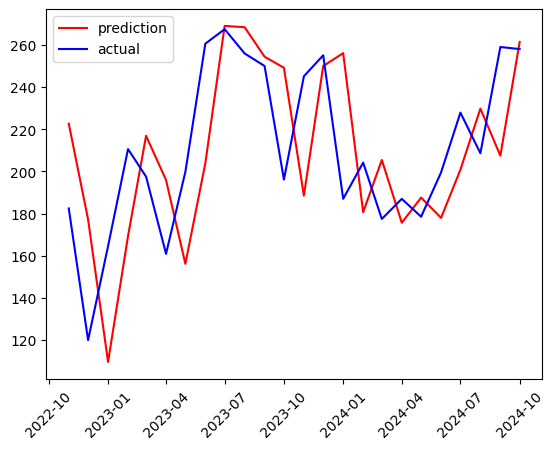

In [19]:
test.loc[:,'predictions'] = predictions.copy()

plt.plot(test['predictions'], color='red', label='prediction')
plt.plot(test['Adj Close'], color='blue', label='actual')
plt.legend(loc="upper left")
plt.xticks(rotation=45)
plt.show()

In [21]:
# evaluate forecasts
from math import sqrt
rmse = sqrt(mean_squared_error(test['predictions'], test['Adj Close']))
mae = mean_absolute_error(test['predictions'], test['Adj Close'])
mape = mean_absolute_percentage_error(test['predictions'], test['Adj Close'])

print('Test RMSE: %.3f' % rmse)
print('Test MAE: %.3f' % mae)
print('Test MAPE: %.3f' % mape)

Test RMSE: 37.200
Test MAE: 31.146
Test MAPE: 0.164


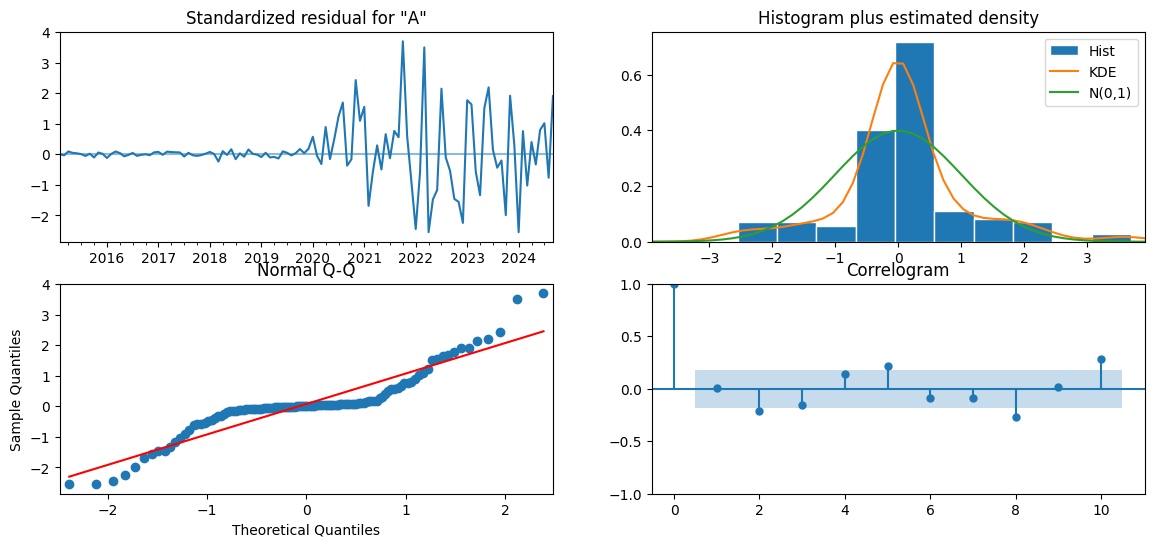

In [22]:
model_fit.plot_diagnostics(figsize=(14, 6))
plt.show()

In [23]:
history = train
# Make predictions
auto_predictions = model_fit.predict(start=len(train), end=len(train) + len(test) - 1)
test.loc[:, 'auto_predictions'] = auto_predictions.copy()

C:\Users\HP\AppData\Local\Temp\ipykernel_20128\1608813560.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test.loc[:, 'auto_predictions'] = auto_predictions.copy()


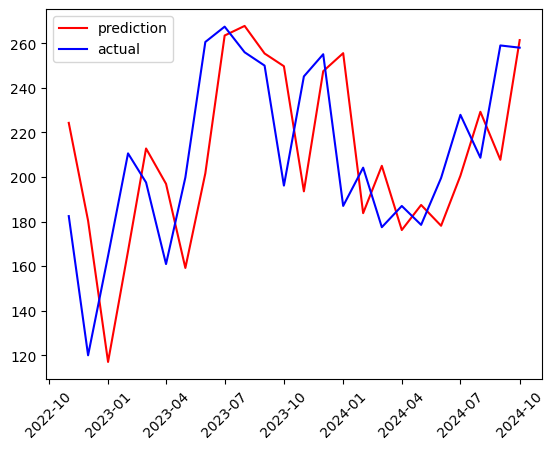

In [24]:
plt.plot(test['auto_predictions'], color='red', label='prediction')
plt.plot(test['Adj Close'], color='blue', label='actual')
plt.legend(loc="upper left")
plt.xticks(rotation=45)
plt.show()

In [25]:
# Calculate Evaluation Metrics
rmse = sqrt(mean_squared_error(test['auto_predictions'], test['Adj Close']))
mae = mean_absolute_error(test['auto_predictions'], test['Adj Close'])
mape = mean_absolute_percentage_error(test['auto_predictions'], test['Adj Close'])

print('Test RMSE: %.3f' % rmse)
print('Test MAE: %.3f' % mae)
print('Test MAPE: %.3f' % mape)


Test RMSE: 36.731
Test MAE: 30.795
Test MAPE: 0.159


In [26]:
Forecast = model_fit.forecast(steps=12)
print(Forecast)

2024-10-01 00:00:00+00:00    261.443990
2024-11-01 00:00:00+00:00    261.558632
2024-12-01 00:00:00+00:00    261.564099
2025-01-01 00:00:00+00:00    261.564360
2025-02-01 00:00:00+00:00    261.564372
2025-03-01 00:00:00+00:00    261.564373
2025-04-01 00:00:00+00:00    261.564373
2025-05-01 00:00:00+00:00    261.564373
2025-06-01 00:00:00+00:00    261.564373
2025-07-01 00:00:00+00:00    261.564373
2025-08-01 00:00:00+00:00    261.564373
2025-09-01 00:00:00+00:00    261.564373
Freq: MS, Name: predicted_mean, dtype: float64
